In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/adult_with_headers.csv")

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.shape


(32561, 15)

In [ ]:
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Checking skewness for numerical columns to understand distribution shape
data.skew(numeric_only=True)

,0
age,0.558743
fnlwgt,1.446980
education_num,-0.311676
capital_gain,11.953848
capital_loss,4.594629
hours_per_week,0.227643


In [ ]:
# Observations:
# 'capital_gain' is extremely right skewed → skewness ≈ 11.95
# 'capital_loss' is also right skewed → skewness ≈ 4.59
# 'fnlwgt' moderately skewed → ≈ 1.44
# 'age' and 'hours_per_week' are slightly skewed → manageable
# 'education_num' is mildly left skewed → ≈ -0.31


In [ ]:
# Extracting all numerical columns (int and float types) for scaling and statistical analysis
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [ ]:
standard_scaled = pd.DataFrame(StandardScaler().fit_transform(data[numerical_cols]), columns=numerical_cols)
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data[numerical_cols]), columns=numerical_cols)


In [ ]:
standard_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [ ]:
minmax_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [ ]:
### For this dataset, applying both StandardScaler and MinMaxScaler is appropriate.
# StandardScaler works well for skewed features like capital_gain and capital_loss,
#while MinMaxScaler is useful for features like education_num and hours_per_week that are more uniformly distributed.
# This helps us understand how different scaling methods affect the data.

In [ ]:
# Extracting all categorical columns (object type) for encoding
categorical_cols = data.select_dtypes(include='object').columns


In [ ]:
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [ ]:
# Checking how many unique categories each column has
unique_counts = data[categorical_cols].nunique()


In [ ]:
unique_counts

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2
native_country,42
income,2


In [ ]:
# Separating columns based on number of unique categories
# One-Hot Encoding → <5 categories
# Label Encoding → >=5 categories
one_hot_cols = unique_counts[unique_counts < 5].index.tolist()
label_encode_cols = unique_counts[unique_counts >= 5].index.tolist()


In [ ]:
one_hot_cols

['sex', 'income']

In [ ]:
label_encode_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [ ]:
# Applying One-Hot Encoding to selected columns
# Creates binary columns for each category
data_encoded = pd.get_dummies(data, columns=one_hot_cols,dtype=int)


In [ ]:
print("\nData after One-Hot Encoding:\n", data_encoded.head())



Data after One-Hot Encoding:
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Female  \
0          2174             0              40   United-States            0   
1      

In [ ]:
# Applying Label Encoding to columns with many categories
# Converts categories to numeric labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in label_encode_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])


In [ ]:
data_encoded[label_encode_cols].head()

,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,1,1,4,39
1,6,9,2,4,0,4,39
2,4,11,0,6,1,4,39
3,4,1,2,6,0,2,39
4,4,9,2,10,5,2,5


In [ ]:
data_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0


In [ ]:
data_encoded.drop('fnlwgt', axis=1, inplace=True)


In [ ]:
data_encoded

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32557,40,4,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32558,58,4,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32559,22,4,11,9,4,1,3,4,0,0,20,39,0,1,1,0


In [ ]:
# Pros and Cons of Label and one hot encoding

# One-Hot Encoding:
# Works best when categories are few (like sex or income)
# Treats each category as separate—no fake order
# Downside: adds extra columns, gets messy if too many categories

# Label Encoding:
# Good when there are lots of categories (like native_country)
# Keeps it simple—just one column
# But it adds fake order, which can confuse some models


In [ ]:
# Creating age_group column to bucket age into life stages
# Helps model understand income patterns based on life phase, not just raw age
data_encoded['age_group'] = pd.cut(
    data_encoded['age'],
    bins=[0, 25, 45, 65, 100],
    labels=['Youth', 'Adult', 'Senior', 'Elder']
)


In [ ]:
data_encoded

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group
0,39,7,9,13,4,1,1,4,2174,0,40,39,0,1,1,0,Adult
1,50,6,9,13,2,4,0,4,0,0,13,39,0,1,1,0,Senior
2,38,4,11,9,0,6,1,4,0,0,40,39,0,1,1,0,Adult
3,53,4,1,7,2,6,0,2,0,0,40,39,0,1,1,0,Senior
4,28,4,9,13,2,10,5,2,0,0,40,5,1,0,1,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,38,39,1,0,1,0,Adult
32557,40,4,11,9,2,7,0,4,0,0,40,39,0,1,0,1,Adult
32558,58,4,11,9,6,1,4,4,0,0,40,39,1,0,1,0,Senior
32559,22,4,11,9,4,1,3,4,0,0,20,39,0,1,1,0,Youth


In [ ]:
# Creating workload column by bucketing hours_per_week
# Raw hours are hard to interpret—this shows work intensity (part-time, full-time, etc.)
data_encoded['workload'] = pd.cut(
    data_encoded['hours_per_week'],
    bins=[0, 20, 40, 60, 100],
    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme']
)


In [ ]:
data_encoded

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group,workload
0,39,7,9,13,4,1,1,4,2174,0,40,39,0,1,1,0,Adult,Full-time
1,50,6,9,13,2,4,0,4,0,0,13,39,0,1,1,0,Senior,Part-time
2,38,4,11,9,0,6,1,4,0,0,40,39,0,1,1,0,Adult,Full-time
3,53,4,1,7,2,6,0,2,0,0,40,39,0,1,1,0,Senior,Full-time
4,28,4,9,13,2,10,5,2,0,0,40,5,1,0,1,0,Adult,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,38,39,1,0,1,0,Adult,Full-time
32557,40,4,11,9,2,7,0,4,0,0,40,39,0,1,0,1,Adult,Full-time
32558,58,4,11,9,6,1,4,4,0,0,40,39,1,0,1,0,Senior,Full-time
32559,22,4,11,9,4,1,3,4,0,0,20,39,0,1,1,0,Youth,Part-time


In [ ]:
# Applying log transformation to capital_gain
# This feature is skewed—log compresses extreme values and helps model treat them fairly
data_encoded['capital_gain_log'] = np.log1p(data_encoded['capital_gain'])


In [ ]:
data_encoded.drop('capital_gain', axis=1, inplace=True)

In [ ]:
data_encoded

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group,workload,capital_gain_log
0,39,7,9,13,4,1,1,4,0,40,39,0,1,1,0,Adult,Full-time,7.684784
1,50,6,9,13,2,4,0,4,0,13,39,0,1,1,0,Senior,Part-time,0.000000
2,38,4,11,9,0,6,1,4,0,40,39,0,1,1,0,Adult,Full-time,0.000000
3,53,4,1,7,2,6,0,2,0,40,39,0,1,1,0,Senior,Full-time,0.000000
4,28,4,9,13,2,10,5,2,0,40,5,1,0,1,0,Adult,Full-time,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,38,39,1,0,1,0,Adult,Full-time,0.000000
32557,40,4,11,9,2,7,0,4,0,40,39,0,1,0,1,Adult,Full-time,0.000000
32558,58,4,11,9,6,1,4,4,0,40,39,1,0,1,0,Senior,Full-time,0.000000
32559,22,4,11,9,4,1,3,4,0,20,39,0,1,1,0,Youth,Part-time,0.000000


In [ ]:
# Used Isolation Forest to find outliers in numeric columns (kept contamination at 1%)
# Added outlier labels and filtered out the abnormal rows
# Dropped the outlier column after cleanup
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(data_encoded.select_dtypes(include=np.number))

data_encoded['outlier'] = outliers
data_encoded = data_encoded[data_encoded['outlier'] == 1]
data_encoded.drop('outlier', axis=1, inplace=True)

In [ ]:
data_encoded.shape

(32235, 18)

In [ ]:
data.shape

(32561, 15)

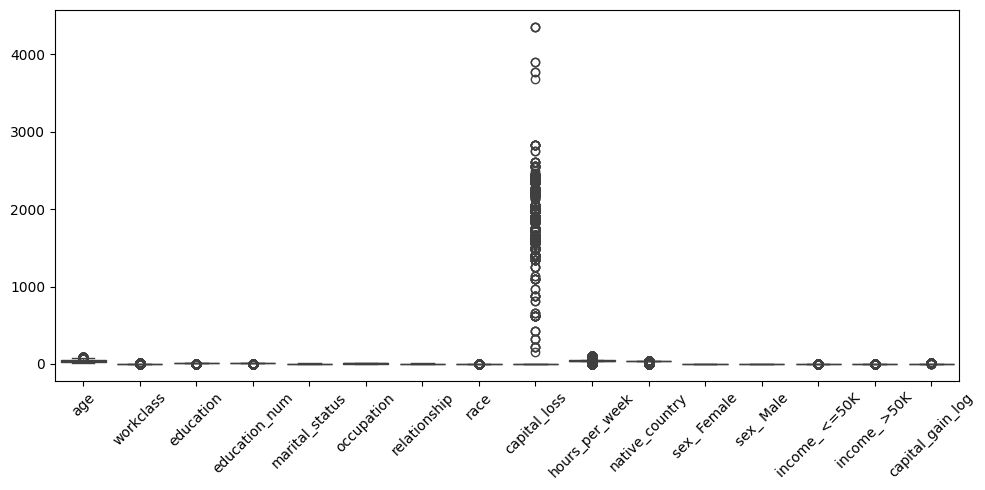

In [ ]:
# Boxplot for numeric columns to visually spot outliers and decide if transformation is needed
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_encoded.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Based on the boxplot above, I've seen some outliers in capital_loss
# So I applied log transformation to compress them and reduce skewness
# Then I dropped the original capital_loss column to avoid redundancy

In [ ]:
data_encoded['capital_loss_log'] = np.log1p(data_encoded['capital_loss'])
data_encoded.drop('capital_loss', axis=1, inplace=True)

In [ ]:
data_encoded

,age,workclass,education,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group,workload,capital_gain_log,capital_loss_log
0,39,7,9,13,4,1,1,4,40,39,0,1,1,0,Adult,Full-time,7.684784,0.0
1,50,6,9,13,2,4,0,4,13,39,0,1,1,0,Senior,Part-time,0.000000,0.0
2,38,4,11,9,0,6,1,4,40,39,0,1,1,0,Adult,Full-time,0.000000,0.0
3,53,4,1,7,2,6,0,2,40,39,0,1,1,0,Senior,Full-time,0.000000,0.0
4,28,4,9,13,2,10,5,2,40,5,1,0,1,0,Adult,Full-time,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,38,39,1,0,1,0,Adult,Full-time,0.000000,0.0
32557,40,4,11,9,2,7,0,4,40,39,0,1,0,1,Adult,Full-time,0.000000,0.0
32558,58,4,11,9,6,1,4,4,40,39,1,0,1,0,Senior,Full-time,0.000000,0.0
32559,22,4,11,9,4,1,3,4,20,39,0,1,1,0,Youth,Part-time,0.000000,0.0


In [ ]:
data_encoded.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'hours_per_week',
       'native_country', 'sex_ Female', 'sex_ Male', 'income_ <=50K',
       'income_ >50K', 'age_group', 'workload', 'capital_gain_log',
       'capital_loss_log'],
      dtype='object')

In [ ]:
# PPS Score couldn't be applied due to environment issues (installing it broke numpy last time)
# So we used correlation matrix on numeric features as a fallback
# This helps us identify which features have strong linear relationship with income_ >50K
# Features like education_num, hours_per_week, and capital_gain_log showed good correlation
# While this doesn't capture non-linear or categorical patterns like PPS, it's still useful for feature selection

correlation_matrix = data_encoded.select_dtypes(include='number').corr()
correlation_matrix['income_ >50K'].sort_values(ascending=False)

,income_ >50K
income_ >50K,1.000000
education_num,0.330861
capital_gain_log,0.283193
age,0.231913
hours_per_week,0.229518
sex_ Male,0.227879
capital_loss_log,0.132553
race,0.092662
education,0.079858
occupation,0.073654
